### Import libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
import os

### Visualizations

***horizontal bar-chart***

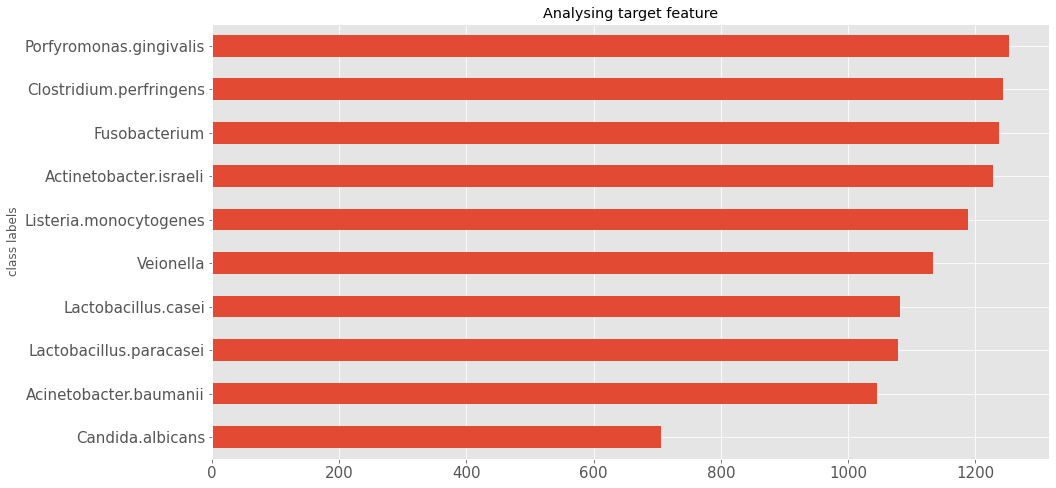

In [ ]:
filepaths=glob.glob("dataset/**/*.*")
df=pd.DataFrame()
df['filepaths']=filepaths
df['class labels']=df['filepaths'].apply(lambda x: x.split("/")[1])

with plt.style.context(style='ggplot'):
    ax=df['class labels'].value_counts(ascending=True).plot.barh(figsize=(15,8),
                                                   fontsize=15,
                                                   title='Analysing target feature',
                                                   ylabel='class labels')
    plt.show()

***Pie-chart and Donut-chart***

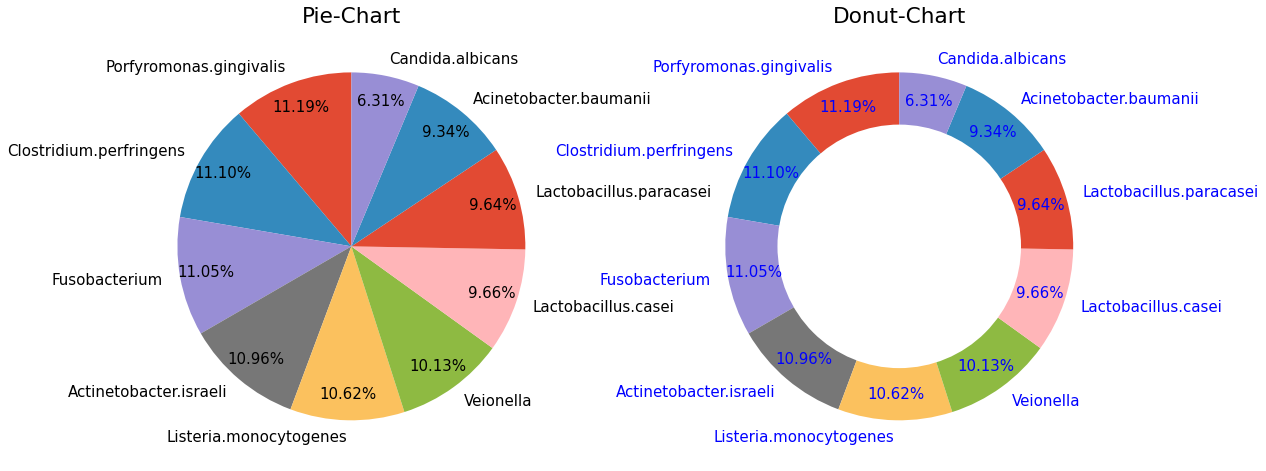

In [ ]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size']=15
    plt.subplot(121)
    plt.pie(x=dict(df['class labels'].value_counts()).values(),
            labels=dict(df['class labels'].value_counts()).keys(),
            autopct='%.2f%%',
            pctdistance=0.85,
            startangle=90)
    plt.title(label='Pie-Chart')
    plt.subplot(122)
    plt.pie(x=dict(df['class labels'].value_counts()).values(),
            labels=dict(df['class labels'].value_counts()).keys(),
            autopct='%.2f%%',
            pctdistance=0.85,
            startangle=90,
            textprops={'color':"b"})
    plt.title(label='Donut-Chart')
    centre_circle=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.show()

### Data loading

In [ ]:
base_dir="dataset"

In [ ]:
data=[]
count=0
for label in class_labels:
    print(f"loading data from {os.path.join(base_dir,label)}")
    files=os.listdir(os.path.join(base_dir,label))
    for file_ in files:
        fullpath=os.path.join(base_dir,label,file_)
        try:
            image=load_img(path=fullpath,
                    grayscale=False,
                    color_mode='rgb',
                    target_size=(128,128))
            array_image=img_to_array(image)
            normalized_image=array_image/255.0
            data.append([normalized_image,count])
        except Exception as e:
            continue
    count+=1
print("Data loading completed")

loading data from input/Fusobacterium
loading data from input/Porfyromonas.gingivalis
loading data from input/Lactobacillus.casei
loading data from input/Veionella
loading data from input/Listeria.monocytogenes
loading data from input/Candida.albicans
loading data from input/Clostridium.perfringens
loading data from input/Lactobacillus.paracasei
loading data from input/Actinetobacter.israeli
loading data from input/Acinetobacter.baumanii
Data loading completed


### Data preprocessing

In [ ]:
X,y=zip(*data)

In [ ]:
X=np.asarray(X)
y=np.asarray(y)
X,y=shuffle(X, y, random_state=42)
print(X.shape,y.shape)

(11184, 128, 128, 3) (11184,)


In [ ]:
X[0]

array([[[0.78039217, 0.68235296, 0.8039216 ],
        [0.74509805, 0.6431373 , 0.81960785],
        [0.7607843 , 0.6431373 , 0.8235294 ],
        ...,
        [0.83137256, 0.8862745 , 0.80784315],
        [0.81960785, 0.8901961 , 0.8039216 ],
        [0.827451  , 0.9019608 , 0.8039216 ]],

       [[0.79607844, 0.76862746, 0.79607844],
        [0.79607844, 0.7137255 , 0.8156863 ],
        [0.78039217, 0.6784314 , 0.8117647 ],
        ...,
        [0.827451  , 0.88235295, 0.8117647 ],
        [0.8117647 , 0.9019608 , 0.7921569 ],
        [0.8235294 , 0.88235295, 0.8039216 ]],

       [[0.8156863 , 0.8117647 , 0.80784315],
        [0.8       , 0.78431374, 0.8       ],
        [0.79607844, 0.73333335, 0.8117647 ],
        ...,
        [0.8235294 , 0.8862745 , 0.8156863 ],
        [0.80784315, 0.8901961 , 0.79607844],
        [0.81960785, 0.8901961 , 0.7882353 ]],

       ...,

       [[0.8156863 , 0.8980392 , 0.7882353 ],
        [0.8235294 , 0.89411765, 0.79607844],
        [0.8117647 , 0

In [ ]:
y[0]

7

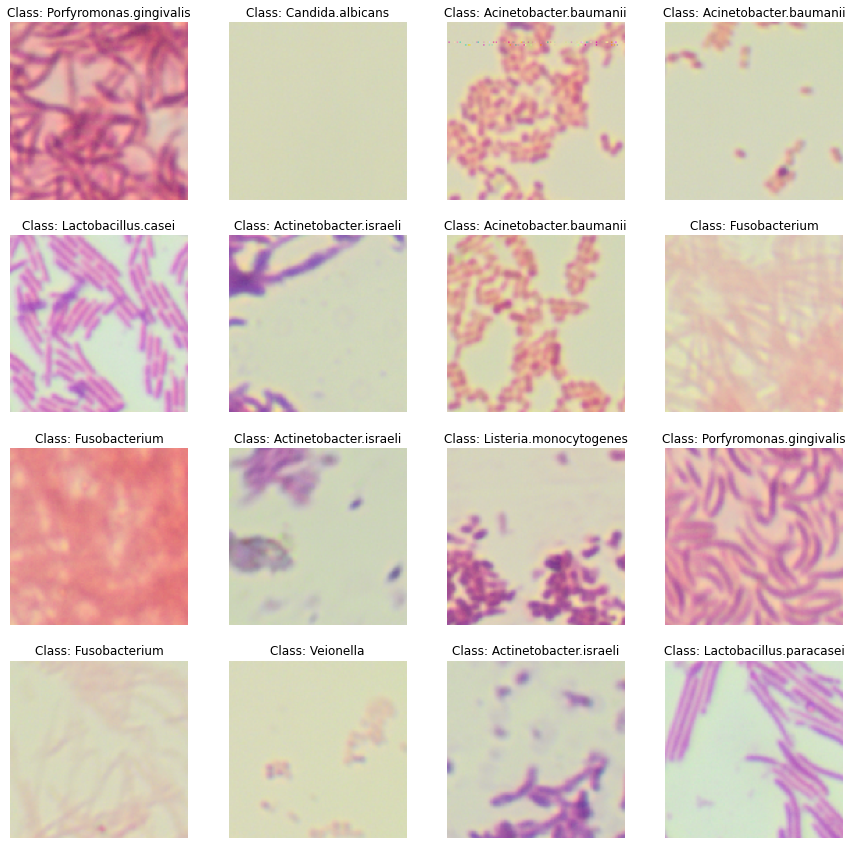

In [ ]:
from random import randint

def show_images(images,labels,str_labels):
    plt.figure(figsize=(15,15))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}")
    plt.show()
show_images(X,y,class_labels)

### ConvolutionalNeuralNetwork

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
y=to_categorical(y)

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1,1),padding="same",activation="relu",input_shape = (128,128,3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=512,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.4))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=256,activation="relu"))
cnn_model.add(Dense(units=128,activation="relu"))
cnn_model.add(Dense(units=len(class_labels),activation="softmax"))

In [ ]:
cnn_model.compile(optimizer=Adam(learning_rate=1e-3,decay=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                        

***Model training***

In [ ]:
history=cnn_model.fit(x=X,y=y,batch_size=32,epochs=15)

Epoch 1/20
350/350 [==============================] - 31s 60ms/step - loss: 0.7930 - accuracy: 0.7604
Epoch 2/20
350/350 [==============================] - 21s 59ms/step - loss: 0.3409 - accuracy: 0.8858
Epoch 3/20
350/350 [==============================] - 20s 58ms/step - loss: 0.2557 - accuracy: 0.9101
Epoch 4/20
350/350 [==============================] - 21s 59ms/step - loss: 0.1644 - accuracy: 0.9438
Epoch 5/20
350/350 [==============================] - 21s 59ms/step - loss: 0.1801 - accuracy: 0.9436
Epoch 6/20
350/350 [==============================] - 21s 59ms/step - loss: 0.1524 - accuracy: 0.9501
Epoch 7/20
350/350 [==============================] - 21s 59ms/step - loss: 0.1226 - accuracy: 0.9604
Epoch 8/20
350/350 [==============================] - 21s 59ms/step - loss: 0.0954 - accuracy: 0.9694
Epoch 9/20
350/350 [==============================] - 21s 59ms/step - loss: 0.0942 - accuracy: 0.9683
Epoch 10/20
350/350 [==============================] - 21s 59ms/step - loss: 0.119

***model saving***

In [ ]:
cnn_model.save("model/ConvolutionalNeuralNetwork_model.h5")